## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
#Top 5 rows 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#Last 5 rows
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [12]:
# Data Inforamtion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [32]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [15]:
# Verifying if there are any null values 
df.isna().values.any()

False

## Statistics on the amounts

In [18]:
# Statistics on the amounts
df.Amount.describe().round(2)

count    284807.00
mean         88.35
std         250.12
min           0.00
25%           5.60
50%          22.00
75%          77.16
max       25691.16
Name: Amount, dtype: float64

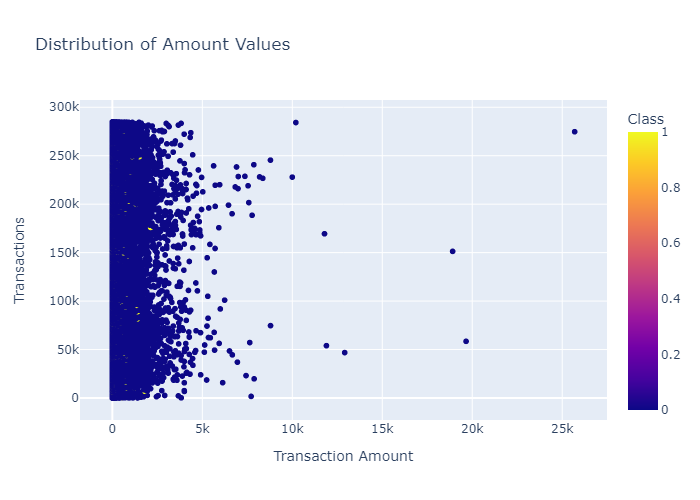

In [31]:
# Distribution of Amounts
fig = px.scatter(df, x = 'Amount', y =df.index, color = df.Class,
                title = 'Distribution of Amount Values')
fig.update_layout(xaxis_title='Transaction Amount',
                    yaxis_title='Transactions')
fig.show('png')

### Class Distribution

In [19]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

### 0 = Normal Transaction

### 1 = fraudulent transaction

In [22]:
# separating the data for analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [42]:
#printing the values
print(f"Shape of Legit transactions: {legit.shape}")
print(f"Shape of Fraudulant transactions: {fraud.shape}")

Shape of Legit transactions: (284315, 31)
Shape of Fraudulant transactions: (492, 31)


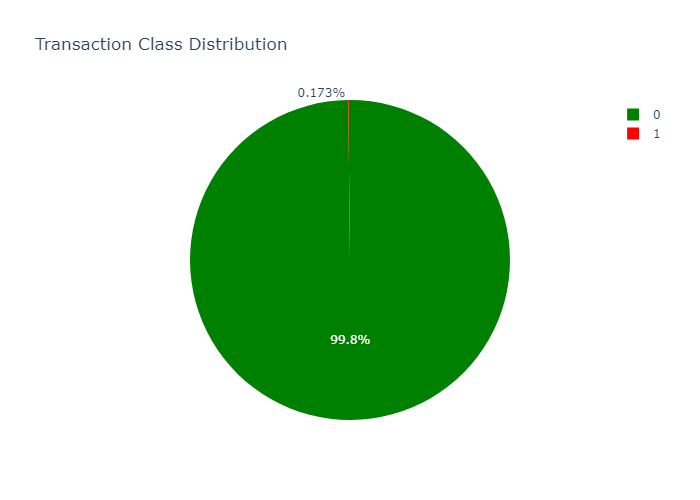

In [118]:
# Visualizing the distribution of transaction classes as a pie chart
count_classes = df['Class'].value_counts().reset_index()
count_classes.columns = ['Class', 'Count']

fig = px.pie(
    count_classes, 
    names='Class', 
    values='Count', 
    title='Transaction Class Distribution', 
    color='Class',
    color_discrete_map={0: 'green', 1: 'red'}  
)

fig.show('png')


In [68]:
# statistical measures of the data
legit_stats = legit.Amount.describe().round(2)

# Print summary statistics
print("Legit Transactions Statistics:")
print(legit_stats)

Legit Transactions Statistics:
count    284315.00
mean         88.29
std         250.11
min           0.00
25%           5.65
50%          22.00
75%          77.05
max       25691.16
Name: Amount, dtype: float64


In [69]:
fraud_stats = fraud.Amount.describe().round(2)

print("\nFraudulent Transactions Statistics:")
print(fraud_stats)


Fraudulent Transactions Statistics:
count     492.00
mean      122.21
std       256.68
min         0.00
25%         1.00
50%         9.25
75%       105.89
max      2125.87
Name: Amount, dtype: float64


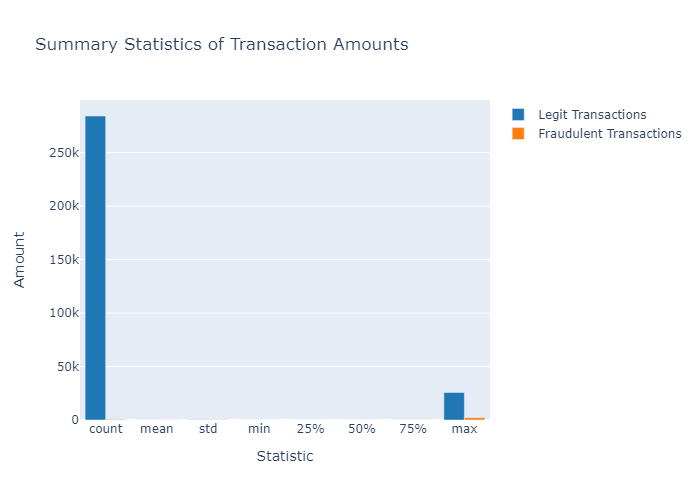

In [64]:
# Create a DataFrame for easy plotting
summary_stats = pd.DataFrame({
    'Statistic': legit_stats.index,
    'Legit Transactions': legit_stats.values,
    'Fraudulent Transactions': fraud_stats.values
})

# Create the bar chart
fig = go.Figure()

# Add Legit Transactions bar
fig.add_trace(go.Bar(
    x=summary_stats['Statistic'],
    y=summary_stats['Legit Transactions'],
    name='Legit Transactions',
    marker_color='#1f77b4'  
))

# Add Fraudulent Transactions bar
fig.add_trace(go.Bar(
    x=summary_stats['Statistic'],
    y=summary_stats['Fraudulent Transactions'],
    name='Fraudulent Transactions',
    marker_color='#ff7f0e' 
))

# Update the layout
fig.update_layout(
    title='Summary Statistics of Transaction Amounts',
    xaxis_title='Statistic',
    yaxis_title='Amount',
    barmode='group'
)

# Show the figure
fig.show('png')


In [27]:
# compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### No. of Fraudulent Transactions = 492

In [70]:
legit_sample = legit.sample(n=492)

### Concatenating two DataFrames

In [72]:
new_df = pd.concat([legit_sample, fraud], axis=0)
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
48271,43572.0,-3.003668,2.246240,1.181428,1.229191,-1.075954,0.686363,-0.389936,0.843656,2.093240,...,-0.594922,-0.637845,0.012100,0.037525,0.271754,-0.416295,0.288648,0.149937,6.64,0
159239,112376.0,-0.538118,1.566354,1.400547,4.132336,0.904547,0.652403,0.675073,0.085555,-2.567270,...,0.270533,0.688085,-0.581152,-0.332554,0.504453,0.697600,-0.051550,0.044162,15.17,0
113370,73041.0,-0.925151,1.047254,2.962419,3.149555,-1.016014,1.836628,-1.114778,1.060625,0.178400,...,0.064779,0.712876,-0.436415,-0.362027,0.379348,0.605648,0.302866,0.095794,0.00,0
47972,43440.0,1.013808,-1.834105,0.203251,-1.244646,-1.682021,-0.506015,-0.692265,-0.242382,-1.810812,...,-0.233162,-0.911237,-0.133404,-0.183554,0.119689,-0.407241,-0.005803,0.072860,285.70,0
19695,30475.0,1.112926,-0.522623,1.091670,0.144716,-1.125293,0.004553,-0.768164,0.207685,1.175223,...,-0.078457,-0.098165,0.069861,0.147948,0.007640,1.018225,-0.027476,0.017220,40.00,0


In [73]:
new_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [ ]:
#DRAW A GRAPH

In [74]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94985.491870,-0.073432,0.015260,0.082228,-0.042730,-0.090597,-0.022968,0.017703,0.027023,-0.021919,...,-0.031090,0.003647,-0.003472,0.010827,-0.041208,0.005378,0.012246,-0.056022,0.024124,90.156118
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Splitting the data into Features & Targets

In [75]:
X = new_df.drop(columns='Class', axis=1)
Y = new_df['Class']

In [76]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
48271    43572.0 -3.003668  2.246240  1.181428  1.229191 -1.075954  0.686363   
159239  112376.0 -0.538118  1.566354  1.400547  4.132336  0.904547  0.652403   
113370   73041.0 -0.925151  1.047254  2.962419  3.149555 -1.016014  1.836628   
47972    43440.0  1.013808 -1.834105  0.203251 -1.244646 -1.682021 -0.506015   
19695    30475.0  1.112926 -0.522623  1.091670  0.144716 -1.125293  0.004553   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [77]:
print(Y)

48271     0
159239    0
113370    0
47972     0
19695     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


### Split the data into Training data & Testing Data

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


### Logistic Regression

In [82]:
model = LogisticRegression()

In [83]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

### Evaluation Model

In [85]:
#Accuracy Score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9479034307496823


In [86]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9390862944162437


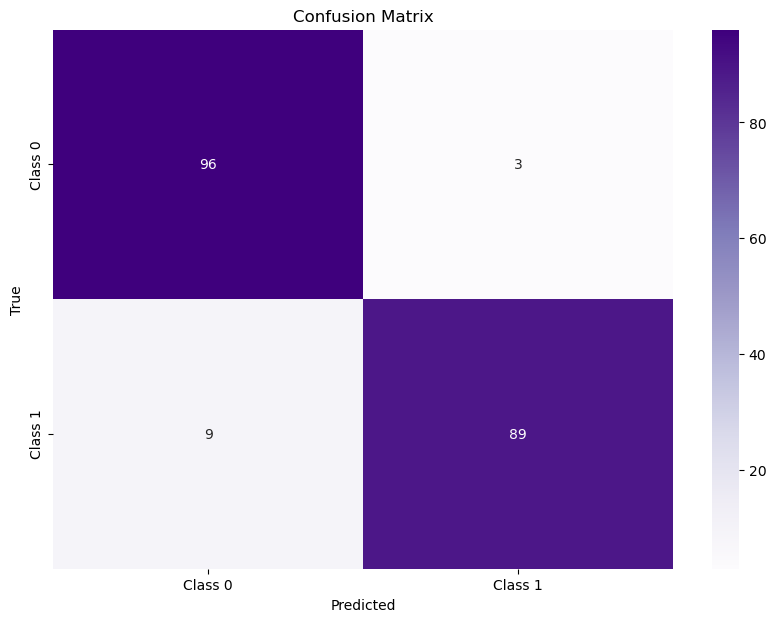

In [131]:
# Generate predictions
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Random Forest

In [90]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [91]:
# Make predictions
rf_predictions = rf_model.predict(X_test)

In [93]:
# Evaluate the model
rf_accuracy = accuracy_score(Y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Random Forest Accuracy: 0.9340


In [97]:
# Confusion Matrix
rf_conf_matrix = confusion_matrix(Y_test, rf_predictions)
print("Confusion Matrix:\n", rf_conf_matrix)

Confusion Matrix:
 [[98  1]
 [12 86]]


In [98]:
# Classification Report
rf_class_report = classification_report(Y_test, rf_predictions)
print("Classification Report:\n", rf_class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94        99
           1       0.99      0.88      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



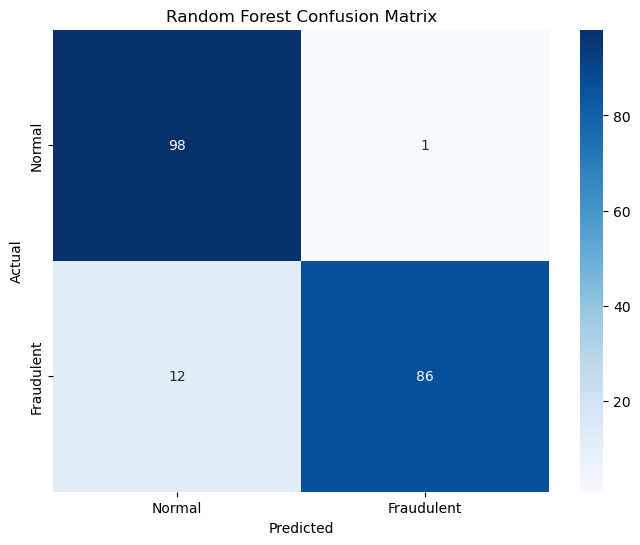

In [99]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Fraudulent'], 
            yticklabels=['Normal', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

### XGBoost

In [105]:
# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, Y_train)

C:\Users\Hp\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[06:32:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [106]:
# Make predictions
xgb_predictions = xgb_model.predict(X_test)

In [108]:
# Evaluate the model
xgb_accuracy = accuracy_score(Y_test, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

XGBoost Accuracy: 0.9239


In [109]:
# Confusion Matrix
xgb_conf_matrix = confusion_matrix(Y_test, xgb_predictions)
print("Confusion Matrix:\n", xgb_conf_matrix)


Confusion Matrix:
 [[97  2]
 [13 85]]


In [110]:
# Classification Report
xgb_class_report = classification_report(Y_test, xgb_predictions)
print("Classification Report:\n", xgb_class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93        99
           1       0.98      0.87      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



Text(0.5, 1.0, 'XG')

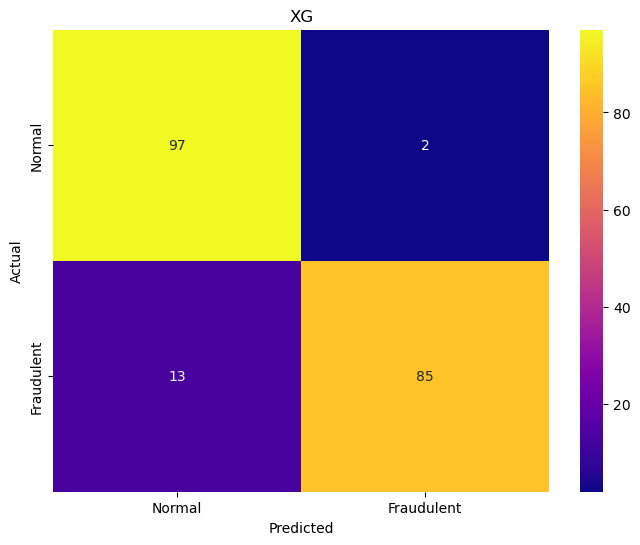

In [119]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', cmap='plasma', 
            xticklabels=['Normal', 'Fraudulent'], 
            yticklabels=['Normal', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XG')

### Comparing the results of models

In [143]:
print("Logistic Regression Accuracy:", log_reg_accuracy)
print("Random Forest Accuracy:", rf_clf_accuracy)
print("XGBoost Accuracy:", xgb_clf_accuracy)

Logistic Regression Accuracy: 0.9390862944162437
Random Forest Accuracy: 0.934010152284264
XGBoost Accuracy: 0.9238578680203046


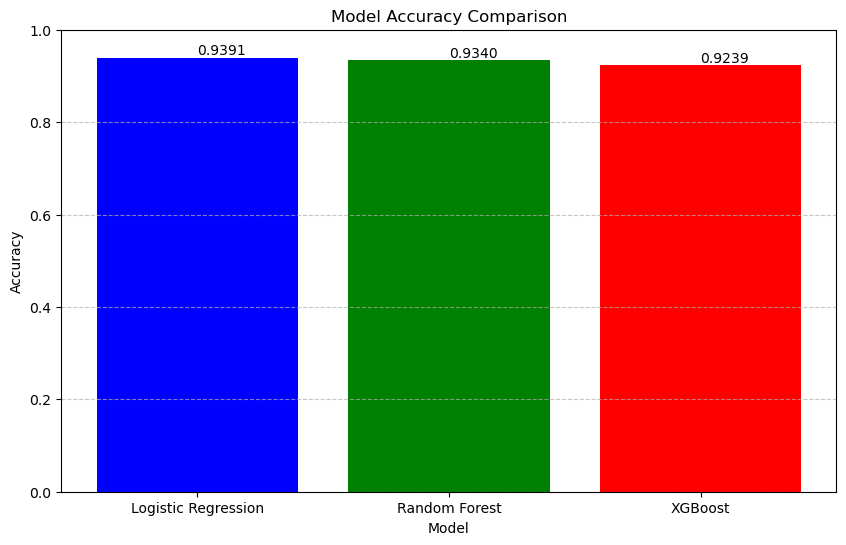

In [146]:
import matplotlib.pyplot as plt

# Accuracy values
accuracies = [log_reg_accuracy, rf_clf_accuracy, xgb_clf_accuracy]
models = ['Logistic Regression', 'Random Forest', 'XGBoost']

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'red'])

# Add accuracy labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', va='bottom')  # va: vertical alignment

# Enhance the plot
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
